# Project 1 Explore Weather Trends
Documentation on how I executed the project and the progress
### Table of Contents
<ul>
<li><a href="#Part 1. SQL Queries and extracting CSV file">Part1. Queries and CSV file</a></li>
<li><a href="#Part 2. Working with python using CSV file to Line Chart">Part2. Data and Charts</a></li>
<li><a href="#Part 3. Observations and Conclusions regarding the line graph">Part3. Observations and Conclusion</a></li>
</ul>

### Part 1. SQL Queries and extracting CSV file
To start off, the first thing I did was writing the queries required to find out what type of data I could use from the database as I wanted to find out if I could find Stockholm, Sweden in the dataset.

My input into the Udacity workspace using SQL was the following:
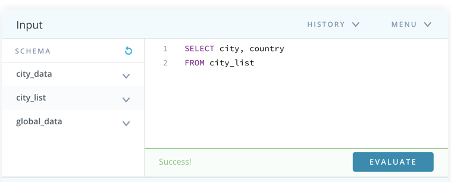

The result was one city recorded in the database, Stockholm. 
For the next step I used the relevant information from the previous query and made a new one, where I wanted to extract the following data:
•	City
•	Year 
•	City Temperature
•	Global Temperature

For which I wrote the following SQL code into the Udacity workspace:

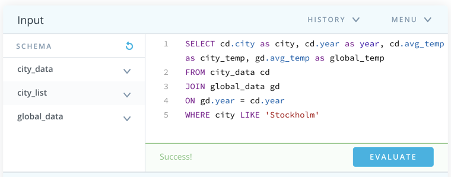

### Part 2. Working with Python using CSV file Data to Produce Line Chart
For the project, i am using Jupyter notebook and with python, pandas andnumpy libraries.

Working with the initial CSV file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette(palette='husl', color_codes=True)

df = pd.read_csv('Explore_Weather_Trends_SQL_Query.csv')

In [2]:
df.head()

,city,year,city_temp,global_temp
0,Stockholm,1750,7.35,8.72
1,Stockholm,1751,6.46,7.98
2,Stockholm,1752,3.08,5.78
3,Stockholm,1753,6.18,8.39
4,Stockholm,1754,6.16,8.47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         264 non-null    object 
 1   year         264 non-null    int64  
 2   city_temp    264 non-null    float64
 3   global_temp  264 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.4+ KB


In [4]:
df.tail()

,city,year,city_temp,global_temp
259,Stockholm,2009,7.54,9.51
260,Stockholm,2010,6.01,9.70
261,Stockholm,2011,8.18,9.52
262,Stockholm,2012,7.21,9.51
263,Stockholm,2013,7.10,9.61


In [5]:
df.describe()

,year,city_temp,global_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,6.402159,8.359394
std,76.354437,0.944810,0.575184
min,1750.000000,3.080000,5.780000
25%,1815.750000,5.810000,8.077500
50%,1881.500000,6.345000,8.365000
75%,1947.250000,7.060000,8.700000
max,2013.000000,8.490000,9.730000


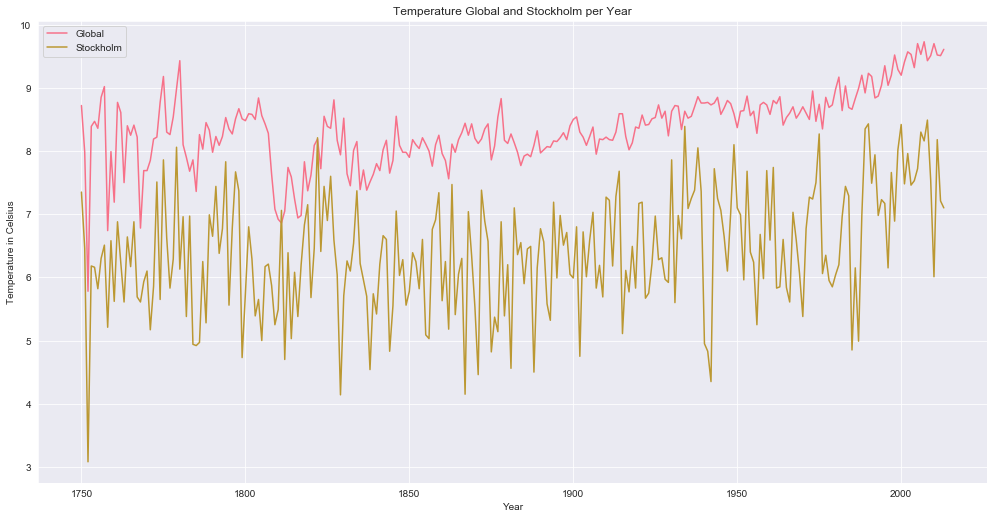

In [6]:
plt.figure(figsize=(17.0,8.5))
plt.title('Temperature Global and Stockholm per Year')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
global_temp = df['global_temp']
sthlm_temp = df['city_temp']
year = df['year']
plt.plot(year, global_temp, label='Global')
plt.plot(year, sthlm_temp, label='Stockholm')
plt.legend()
plt.show()

**Quick Note:**
We obviously need to use a moving average to see a trend more clearly.

#### Calculating Moving Averages and Creating a Line Chart
In the data, the year range is 1750 to 2013, and the average temperatures on the city level for Stockholm ranges from 3,08 degrees Celsius to 8,49 degrees, while on a global level, it ranges from 5,78 degrees to 9,73 degrees Celsius. With that in mind, I chose to use 10-year moving averages after experimenting how linear versus volatile the lines became dependent on an increase or a decrease of moving averages.


In [7]:
# Calculating a moving average of 10-years for global and stockholm temperatures

df_glob_ma = df['global_temp'].rolling(window=10).mean()
df_sthlm_ma = df['city_temp'].rolling(window=10).mean()

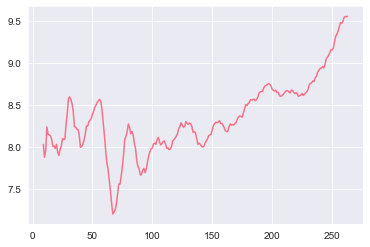

In [8]:
df_glob_ma.plot();

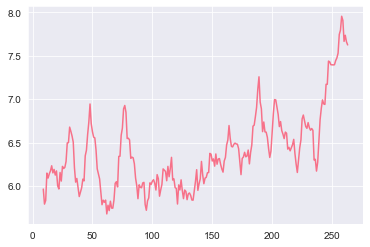

In [9]:
df_sthlm_ma.plot();

In [10]:
df_ma = df.drop(labels=['city_temp', 'global_temp'], axis=1)
df_ma = pd.concat([df_ma, pd.DataFrame(df_sthlm_ma), pd.DataFrame(df_glob_ma)], axis=1)

In [11]:
df_ma.head()

,city,year,city_temp,global_temp
0,Stockholm,1750,NaN,NaN
1,Stockholm,1751,NaN,NaN
2,Stockholm,1752,NaN,NaN
3,Stockholm,1753,NaN,NaN
4,Stockholm,1754,NaN,NaN


In [12]:
#dropping rows that does not have any moving averages
df_ma.dropna(axis=0)

,city,year,city_temp,global_temp
9,Stockholm,1759,5.965,8.030
10,Stockholm,1760,5.792,7.877
11,Stockholm,1761,5.834,7.956
12,Stockholm,1762,6.149,8.239
13,Stockholm,1763,6.092,8.150
...,...,...,...,...
259,Stockholm,2009,7.906,9.493
260,Stockholm,2010,7.665,9.543
261,Stockholm,2011,7.735,9.554
262,Stockholm,2012,7.660,9.548


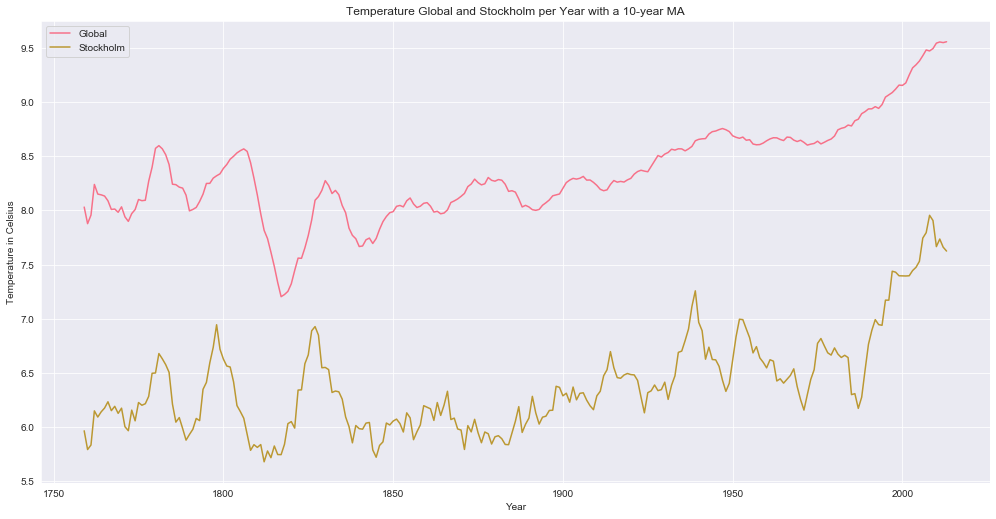

In [13]:
# Plotting the line chart for the moving averages
plt.figure(figsize=(17.0,8.5))
plt.title('Temperature Global and Stockholm per Year with a 10-year MA')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Year')
global_temp = df_ma['global_temp']
sthlm_temp = df_ma['city_temp']
year = df['year']
plt.plot(year, global_temp, label='Global')
plt.plot(year, sthlm_temp, label='Stockholm')
plt.legend()
plt.show()

### Part 3. Observations and Conclusions regarding the line graph

1. 	The first thing that comes to mind is that the global trend is a lot smoother and has less variability than the data from my local data in Stockholm. 
2.	Also, the temperatures are in general, a lot cooler in Stockholm than the average global temperatures.
3.	Over time, it is very evident that both temperatures consistently increase slowly over time, however the local data has a slightly increased variability, despite the moving average calculation that mitigates spikes in the original data. 
4.	However, notwithstanding my earlier point on variability, both trend lines are rather consistent, and it is clear that temperatures are rising over time.
5.	The overall trend shows that after a period of more variance 1760-1850 the temperatures have been slowly rising at an increasing rate both globally as well as locally in Stockholm, Sweden.
